# Feature Selection

The aim of this analysis is to check how our features perform across different feature selection models. I will collect several methods that used in feature selection process. Depending on your data structure and goals, only couple of them might be enough but here I illustrate how all models works. Since the data is imbalance, I use f1 score the compare models but in the next section, I will use several others. 


In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt



# 1. Data

In [2]:
data = pd.read_csv('thl_recoded.csv')
data.head()

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,"age_bins_(34, 44]","age_bins_(44, 54]","age_bins_(54, 70]",education_1.0,education_2.0,education_3.0,education_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
0,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,13.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,1.0,1.0,1.0,3.0,2.0,23.0,17.0,3.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,5.0,1.0,2.0,1.0,4.0,3.0,24.0,18.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.0,7.0,2.0,2.0,1.0,3.0,2.0,22.0,12.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,5.0,1.0,1.0,1.0,3.0,2.0,24.0,16.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [3]:
 # Kannabis use
data['kannabis'].value_counts(normalize= True)

0.0    0.914525
1.0    0.085475
Name: kannabis, dtype: float64

## 1.1. Outliers

In [4]:
def outlier(df, variable_list):
    from collections import Counter
    outlier_indexes = []
    
    for i in variable_list:
        
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)


        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        total_filter = ((df[i] < lower_bound) | (df[i] > upper_bound))

        outlier_observation = df[i][total_filter]
        outlier_index = outlier_observation.index
        
        outlier_indexes.extend(outlier_index)
        
    outlier_indexes = Counter(outlier_indexes)
    
    common_index = [i for i, v in outlier_indexes.items() if v > 0]
    
    return common_index

In [5]:
numeric_list =['alcohol_use', 'nuuska', 'cigarette', 'e_cigarette', 
                'prob_country', 'prob_resident', 
                'risk_of_use', 'risk_of_try', 
                'cannabis_access', 'other_drug_access', 
                'intoxicant_access', 'doping_access', 'current_health', 'sport' ]

outlier_rows = outlier(data, numeric_list)

In [6]:
data.loc[outlier_rows]

,kannabis,alcohol_use,nuuska,cigarette,e_cigarette,prob_country,prob_resident,risk_of_use,risk_of_try,cannabis_access,...,"age_bins_(34, 44]","age_bins_(44, 54]","age_bins_(54, 70]",education_1.0,education_2.0,education_3.0,education_4.0,violence_treat_1.0,violence_treat_2.0,violence_treat_3.0
5,0.0,7.0,5.0,2.0,1.0,3.0,3.0,23.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
36,0.0,3.0,4.0,5.0,2.0,3.0,2.0,22.0,16.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
45,0.0,5.0,5.0,2.0,1.0,3.0,1.0,22.0,13.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
66,0.0,4.0,5.0,2.0,2.0,3.0,4.0,21.0,15.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
67,0.0,6.0,5.0,2.0,1.0,3.0,3.0,17.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,0.0,5.0,1.0,1.0,1.0,3.0,3.0,24.0,18.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2914,0.0,5.0,1.0,1.0,1.0,3.0,2.0,23.0,15.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2960,0.0,3.0,1.0,1.0,1.0,3.0,2.0,24.0,18.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2967,0.0,3.0,1.0,3.0,1.0,3.0,3.0,21.0,14.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


Although variables' values in scale format, this method detect to many outlierns, around 1/2 of the data. We can use robust scaling to normalize the data in later stage. 

## 1.2. Data Split

In [7]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [8]:
print('Dimension of X train: ', X_train.shape)
print('Target 1: ', np.count_nonzero(y_train == 1))
print('Target 0: ', np.count_nonzero(y_train == 0))



print('\n ---------------------\n')
print('Dimension of X test :', X_test.shape)
print('Target 1: ', np.count_nonzero(y_test == 1))
print('Target 0: ', np.count_nonzero(y_test == 0))




Dimension of X train:  (2260, 55)
Target 1:  193
Target 0:  2067

 ---------------------

Dimension of X test : (969, 55)
Target 1:  83
Target 0:  886


## 1.3. Scaling

Robust Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile). I will use scaled in only in SVC model since decision tree models do not need. 




In [9]:
from sklearn.preprocessing import RobustScaler

robust = RobustScaler()
X_train_std = robust.fit_transform(X_train)
X_test_std = robust.transform(X_test)

# 2. Univariate Statistics - Filter Methods

Our main aim to find out statistically significant / meaningful relationship between features and target.

In this part, we will look at the different methods under the filter methods.

- Removing features with low variance 
- Variance Threshold
- KBest models for both classification and regression problems
- Information gain for both classification and regression problems
- Select percentile

## 2.1. Removing features with low variance - Variance Threshold

Variance threshold allows us to set a minimum threshold for an accepted variance in each feature. As a default it removes all zero-variance features (same value in all samples).

In [10]:
from sklearn.feature_selection import VarianceThreshold

vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train_std)
data.columns[1:]
X_train_vth = X_train_std[:, vth.get_support()]

# since we use array, we pull column names from the original df
d1 = data.columns.tolist()
d1 = d1[1:]
d1

pd.DataFrame( {'Feature': d1,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)

,Feature,Variance
31,doping_hp_1,0.002207
42,gender_3,0.002648
48,education_1.0,0.014389
30,poly_hp_1,0.014389
28,drug_hp_1,0.017386
29,medicine_hp_1,0.023323
15,non_medical_1,0.024165
27,alcohol_hp_1,0.062350
17,divorced_1,0.068810
49,education_2.0,0.070314


None of our features have a zero variance, for that reason we didn't remove any of our features.


## 2.2. Select KBest for Classification Problems

Feature 0 : 44.317
Feature 1 : 249.667
Feature 2 : 99.035
Feature 3 : 227.343
Feature 4 : 134.601
Feature 5 : 18.492
Feature 6 : 189.311
Feature 7 : 269.955
Feature 8 : 1.951
Feature 9 : 1.306
Feature 10 : 7.329
Feature 11 : 2.434
Feature 12 : 4.041
Feature 13 : 0.004
Feature 14 : 14.16
Feature 15 : 219.384
Feature 16 : 52.343
Feature 17 : 4.449
Feature 18 : 30.777
Feature 19 : 21.217
Feature 20 : 3.809
Feature 21 : 2.717
Feature 22 : 13.528
Feature 23 : 7.355
Feature 24 : 226.154
Feature 25 : 963.654
Feature 26 : 535.3
Feature 27 : 15.699
Feature 28 : 118.33
Feature 29 : 1.385
Feature 30 : 10.612
Feature 31 : 0.842
Feature 32 : 10.775
Feature 33 : 262.158
Feature 34 : 14.864
Feature 35 : 42.912
Feature 36 : 12.999
Feature 37 : 46.355
Feature 38 : 60.618
Feature 39 : 9.328
Feature 40 : 23.647
Feature 41 : 22.874
Feature 42 : 0.561
Feature 43 : 22.84
Feature 44 : 61.165
Feature 45 : 4.749
Feature 46 : 14.21
Feature 47 : 57.564
Feature 48 : 3.128
Feature 49 : 13.035
Feature 50 : 0.15
Fea

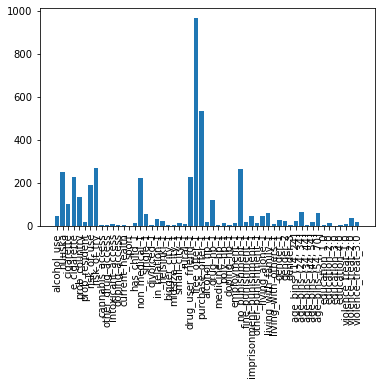

In [11]:
from sklearn.feature_selection import SelectKBest,SelectPercentile,f_classif,f_regression
Kbest_classif = SelectKBest(score_func=f_classif, k=6)
Kbest_classif.fit(X_train_std, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([d1[ i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (12,16)
plt.show()


## 2.3. Select KBest for Regression Problems

Feature 0 : 44.317
Feature 1 : 249.667
Feature 2 : 99.035
Feature 3 : 227.343
Feature 4 : 134.601
Feature 5 : 18.492
Feature 6 : 189.311
Feature 7 : 269.955
Feature 8 : 1.951
Feature 9 : 1.306
Feature 10 : 7.329
Feature 11 : 2.434
Feature 12 : 4.041
Feature 13 : 0.004
Feature 14 : 14.16
Feature 15 : 219.384
Feature 16 : 52.343
Feature 17 : 4.449
Feature 18 : 30.777
Feature 19 : 21.217
Feature 20 : 3.809
Feature 21 : 2.717
Feature 22 : 13.528
Feature 23 : 7.355
Feature 24 : 226.154
Feature 25 : 963.654
Feature 26 : 535.3
Feature 27 : 15.699
Feature 28 : 118.33
Feature 29 : 1.385
Feature 30 : 10.612
Feature 31 : 0.842
Feature 32 : 10.775
Feature 33 : 262.158
Feature 34 : 14.864
Feature 35 : 42.912
Feature 36 : 12.999
Feature 37 : 46.355
Feature 38 : 60.618
Feature 39 : 9.328
Feature 40 : 23.647
Feature 41 : 22.874
Feature 42 : 0.561
Feature 43 : 22.84
Feature 44 : 61.165
Feature 45 : 4.749
Feature 46 : 14.21
Feature 47 : 57.564
Feature 48 : 3.128
Feature 49 : 13.035
Feature 50 : 0.15
Fea

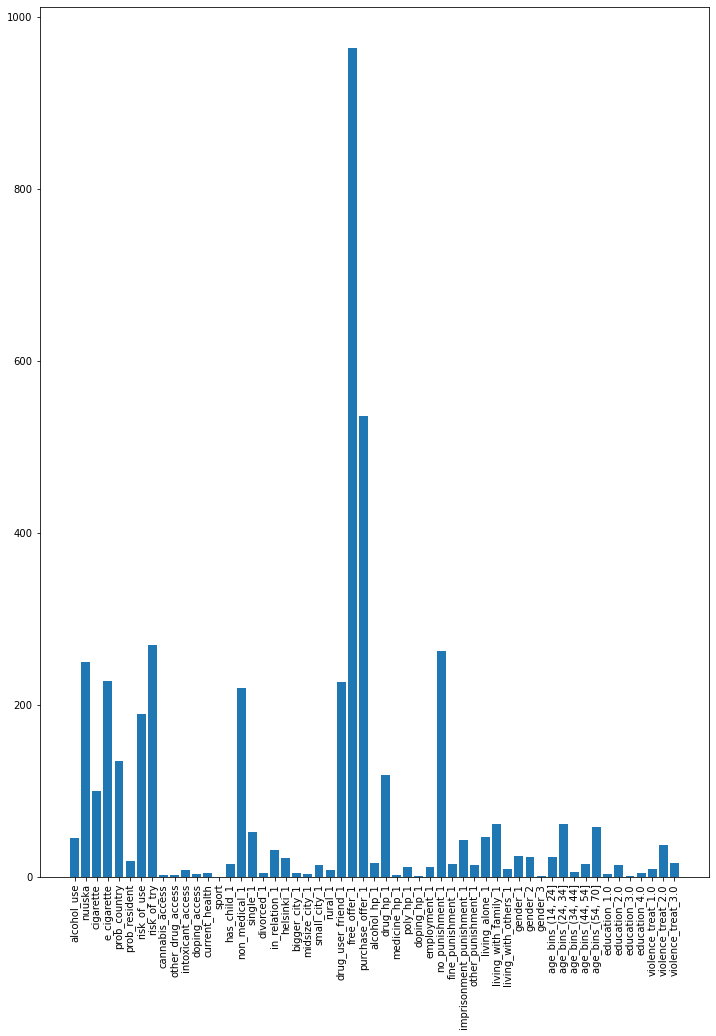

In [12]:
Kbest_reg = SelectKBest(score_func=f_regression, k=6)
Kbest_reg.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(Kbest_reg.scores_)):
    print(f'Feature {i} : {round(Kbest_reg.scores_[i],3)}')

print()


# plot the scores
plt.bar([d1[i] for i in range(len(Kbest_reg.scores_))], Kbest_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.4. Information Gain - Classification Problems

Feature 0 : 0.012
Feature 1 : 0.057
Feature 2 : 0.033
Feature 3 : 0.045
Feature 4 : 0.03
Feature 5 : 0.001
Feature 6 : 0.046
Feature 7 : 0.054
Feature 8 : 0.056
Feature 9 : 0.02
Feature 10 : 0.012
Feature 11 : 0.011
Feature 12 : 0.003
Feature 13 : 0.0
Feature 14 : 0.0
Feature 15 : 0.026
Feature 16 : 0.003
Feature 17 : 0.006
Feature 18 : 0.002
Feature 19 : 0.008
Feature 20 : 0.0
Feature 21 : 0.009
Feature 22 : 0.008
Feature 23 : 0.009
Feature 24 : 0.052
Feature 25 : 0.105
Feature 26 : 0.051
Feature 27 : 0.004
Feature 28 : 0.028
Feature 29 : 0.0
Feature 30 : 0.0
Feature 31 : 0.0
Feature 32 : 0.001
Feature 33 : 0.038
Feature 34 : 0.0
Feature 35 : 0.015
Feature 36 : 0.0
Feature 37 : 0.015
Feature 38 : 0.004
Feature 39 : 0.0
Feature 40 : 0.005
Feature 41 : 0.023
Feature 42 : 0.0
Feature 43 : 0.013
Feature 44 : 0.01
Feature 45 : 0.0
Feature 46 : 0.0
Feature 47 : 0.018
Feature 48 : 0.0
Feature 49 : 0.011
Feature 50 : 0.004
Feature 51 : 0.004
Feature 52 : 0.0
Feature 53 : 0.01
Feature 54 : 0.0

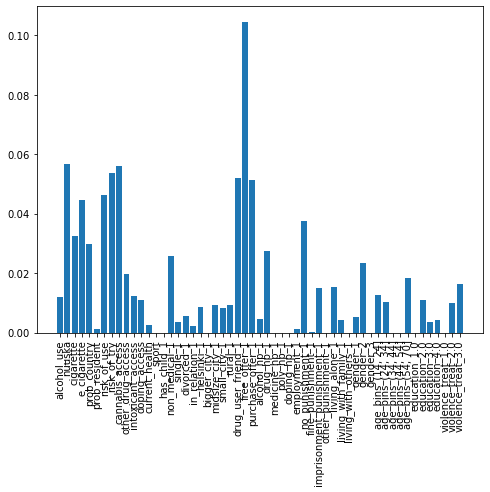

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression,mutual_info_classif
infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([d1[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.5. Information Gain- Regression Problems

Feature 0: 0.029477
Feature 1: 0.056147
Feature 2: 0.043284
Feature 3: 0.024295
Feature 4: 0.011122
Feature 5: 0.002868
Feature 6: 0.037264
Feature 7: 0.079859
Feature 8: 0.057035
Feature 9: 0.028588
Feature 10: 0.023768
Feature 11: 0.034240
Feature 12: 0.001692
Feature 13: 0.000000
Feature 14: 0.000000
Feature 15: 0.019854
Feature 16: 0.006774
Feature 17: 0.000000
Feature 18: 0.000000
Feature 19: 0.000000
Feature 20: 0.000000
Feature 21: 0.000000
Feature 22: 0.000000
Feature 23: 0.005144
Feature 24: 0.019254
Feature 25: 0.095342
Feature 26: 0.064300
Feature 27: 0.004495
Feature 28: 0.018340
Feature 29: 0.006054
Feature 30: 0.000000
Feature 31: 0.000000
Feature 32: 0.000000
Feature 33: 0.048370
Feature 34: 0.003792
Feature 35: 0.004602
Feature 36: 0.026532
Feature 37: 0.038918
Feature 38: 0.037986
Feature 39: 0.000000
Feature 40: 0.011539
Feature 41: 0.012120
Feature 42: 0.010544
Feature 43: 0.000000
Feature 44: 0.029345
Feature 45: 0.000000
Feature 46: 0.000000
Feature 47: 0.000000
Fe

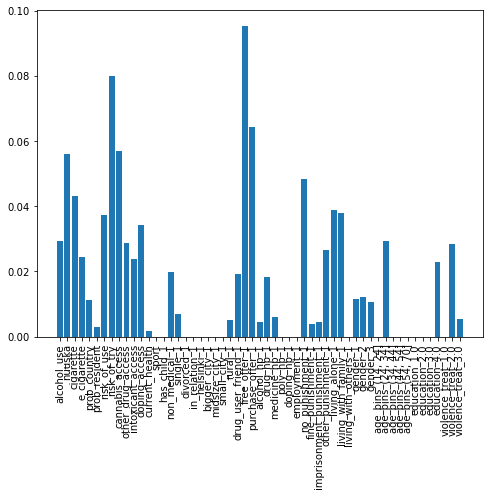

In [14]:
Kbest_reg = SelectKBest(score_func=f_regression, k=6)
Kbest_reg.fit(X_train_std, y_train)



infogain_reg = SelectKBest(score_func=mutual_info_regression, k=6)

infogain_reg.fit(X_train_std, y_train)



# what are scores for the features
for i in range(len(infogain_reg.scores_)):
    print('Feature %d: %f' % (i, infogain_reg.scores_[i]))


# plot the scores
plt.bar([d1[i] for i in range(len(infogain_reg.scores_))], infogain_reg.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

## 2.6. Select Percentile

In [15]:
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train_std, y_train)
percentile.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False, False,  True,
        True])

In [16]:
pd.DataFrame(percentile.get_support(), index=data.columns[1:],columns=['Rank'])

,Rank
alcohol_use,True
nuuska,True
cigarette,True
e_cigarette,True
prob_country,True
prob_resident,True
risk_of_use,True
risk_of_try,True
cannabis_access,False
other_drug_access,False


In [17]:
rf_df = pd.DataFrame(percentile.get_support(),index=data.columns[1:],columns=['Rank']).sort_values(by='Rank',ascending=False)
rf_df.head(20)

,Rank
alcohol_use,True
in_relation_1,True
drug_user_friend_1,True
free_offer_1,True
purchase_offer_1,True
nuuska,True
drug_hp_1,True
no_punishment_1,True
imprisonment_punishment_1,True
living_alone_1,True


**Summary:** All these models produce very similar results. 

# 3. L1 and L2 regularization as penalties against model complexity


In [18]:
from sklearn.linear_model import LogisticRegression

LogisticRegression(penalty='l1')

LogisticRegression(penalty='l1')

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
# Note that C=1.0 is the default. You can increase
# or decrease it to make the regulariztion effect
# stronger or weaker, respectively.
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9424778761061947
Test accuracy: 0.9380804953560371


In [20]:
lr.intercept_

array([-4.99831002])

Since we have only one class in target, it gives us only one value, which can also interpreted as coeffient. 

In [21]:
np.set_printoptions(8)


In [22]:
lr.coef_[lr.coef_!=0].shape



(40,)

In [23]:
lr.coef_

array([[ 0.53658458,  0.1836463 ,  0.29651208,  0.35517147, -0.27747046,
        -0.18989695, -0.16206627, -0.52264303, -0.06273147,  0.        ,
         0.67267137,  0.        , -0.21737041,  0.07561747,  0.00245387,
         0.64308004,  0.        ,  0.        ,  0.08808809,  0.23929712,
         0.01027825,  0.53546824, -0.23970438, -0.0720746 ,  0.98598514,
         1.94076271,  0.40943686,  0.        ,  0.85650591,  0.        ,
        -0.21923054,  0.        ,  0.        ,  0.86551684, -0.01060268,
        -0.1955796 ,  0.        ,  0.44621814, -0.03482352,  0.        ,
         0.        ,  0.31621772,  0.        ,  0.        ,  0.02067097,
        -0.37729406, -0.43660446, -1.18369665, -0.25950391,  0.        ,
        -0.09292365,  0.01305687, -0.04831358,  0.04918481,  0.        ]])

As we can see, all feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01); C is the inverse of the regularization parameter, 𝜆:

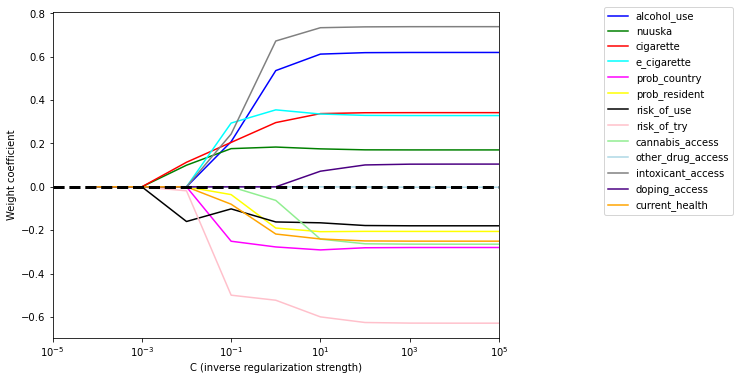

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, solver='liblinear', #  C=10.**c,
                             random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=data.columns[column + 1],
             color=color)

    
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)

#plt.savefig('figures/04_08.png', dpi=300, 
#            bbox_inches='tight', pad_inches=0.2)

plt.show()

**Summary:**  Logistic regression shows us which features have higher weights and what kind of relationship exists between target and features. For instance, when we look at the graph above, age, risk of try, non-medical drug use have the hightest impact on target. Besides, while age and risk of try (perception score of how risky the drug use) are negatively correlated with target, using non-medical drugs are positively correlated with cannabis use. 

# 4. Sequential feature selection algorithms

A classic sequential feature selection algorithm is sequential backward selection (SBS), which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in the performance of the classifier to improve upon computational efficiency. 

The idea behind the SBS algorithm is quite simple: SBS sequentially removes features from the full feature subset until the new feature subspace contains the desired number of features. In order to determine which feature is to be removed at each stage, we need to define the criterion function, J, that we want to minimize.

In [25]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score



We defined the k_features parameter to specify the desired number of features we want to return. By default, we use the accuracy_score from scikit-learn to evaluate the performance of a model (an estimator for classification) on the feature subsets.

Our SBS algorithm collects the scores of the best feature subset at each stage, so let's move on to the more exciting part of our implementation and plot the classification accuracy of the KNN classifier that was calculated on the validation dataset. 

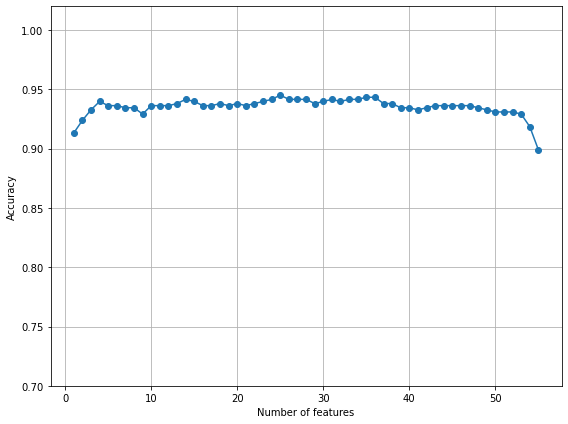

In [26]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('figures/04_09.png', dpi=300)
plt.show()

To satisfy our own curiosity, let's see what the smallest feature subset (k=3), which yielded such a good performance on the validation dataset.



In [27]:
k3 = list(sbs.subsets_[30])
print('Number of indicators: ', len(k3))

print('------------------ \n')
print(data.columns[1:][k3])

Number of indicators:  25
------------------ 

Index(['alcohol_use', 'nuuska', 'e_cigarette', 'prob_country', 'prob_resident',
       'risk_of_use', 'risk_of_try', 'cannabis_access', 'doping_access',
       'sport', 'single_1', 'helsinki_1', 'bigger_city_1', 'midsize_city_1',
       'small_city_1', 'drug_user_friend_1', 'free_offer_1',
       'purchase_offer_1', 'employment_1', 'fine_punishment_1',
       'imprisonment_punishment_1', 'living_alone_1', 'gender_1',
       'age_bins_(24, 34]', 'violence_treat_2.0'],
      dtype='object')


Using the preceding code, we obtained the column indices of the three-feature subset from the 50th position in the sbs.subsets_ attribute and returned the corresponding feature names from the column index of the pandas Wine DataFrame.

Next, let's evaluate the performance of the KNN classifier on the original test dataset:

In [28]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.9442477876106194
Test accuracy: 0.9256965944272446


In the preceding code section, we used the complete feature set and obtained approximately 94 percent accuracy on the training dataset and approximately 91 percent accuracy on the test dataset, which indicates that our model already generalizes well to new data. 

Now, let's use the selected three-feature subset and see how well KNN performs:

In [29]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9464601769911505
Test accuracy: 0.9267285861713106


When using less than a quarter of the original features in our dataset, the prediction accuracy on the test dataset degreaaed slightly but only with 17 features out of 63, it is pretty good. 

# 5. Assessing feature importance with Random Forests


In [30]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train_std, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

In [31]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) free_offer_1                   0.128303
 2) risk_of_try                    0.071915
 3) purchase_offer_1               0.067015
 4) risk_of_use                    0.057665
 5) nuuska                         0.052881
 6) e_cigarette                    0.041987
 7) no_punishment_1                0.040393
 8) cigarette                      0.032713
 9) alcohol_use                    0.032357
10) intoxicant_access              0.024764
11) other_drug_access              0.023878
12) sport                          0.023834
13) drug_user_friend_1             0.023794
14) prob_resident                  0.023338
15) prob_country                   0.023198
16) cannabis_access                0.023192
17) doping_access                  0.021980
18) non_medical_1                  0.020812
19) current_health                 0.019965
20) age_bins_(24, 34]              0.014596
21) fine_punishment_1              0.012311
22) violence_treat_2.0             0.012170
23) living_alone_1              

### Plot the important features

Once the regressor is fitted, the importance of the features is stored inside the feature_importances_ property of the estimator instance.

Let’s, for example, draw a bar chart with the features sorted from the most important to the less important. We’ll have to create a list of tuples. The first element of the tuple is the feature name, the second element is the importance. Then we order our list for importance value and plot a horizontal bar plot.

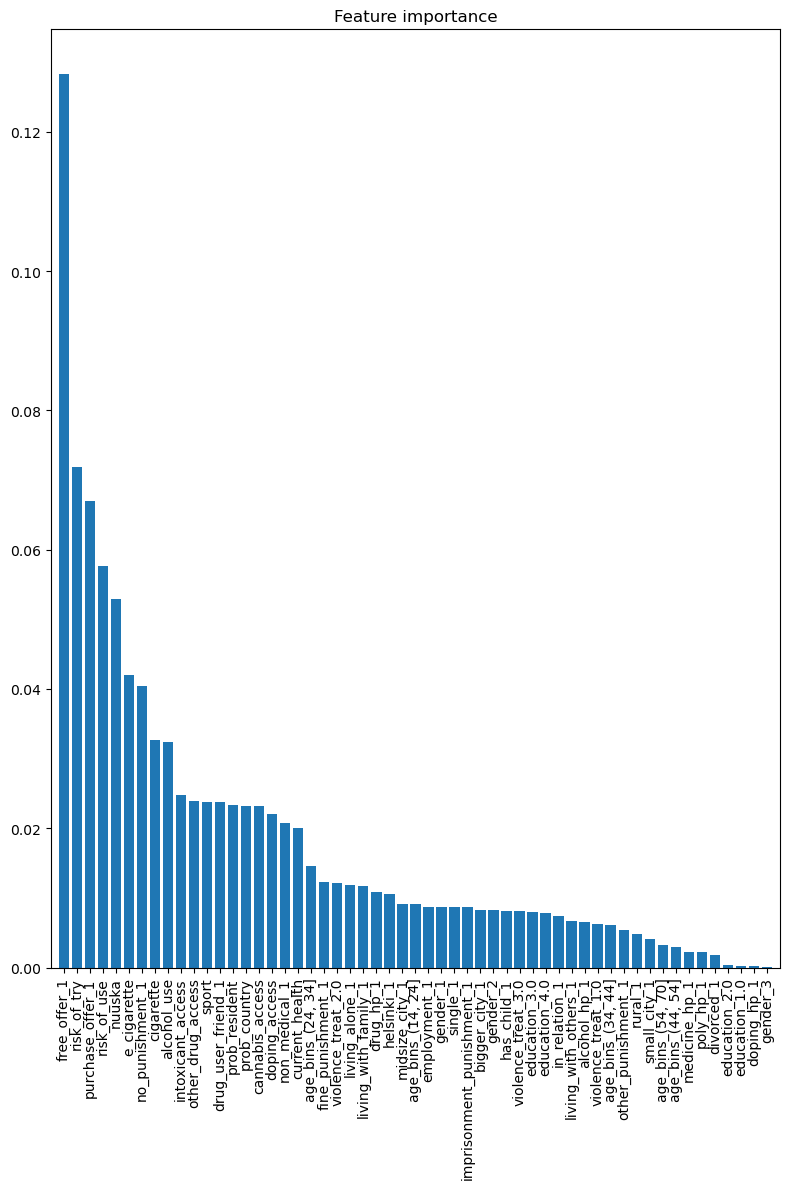

In [32]:
# Plot

from matplotlib.pyplot import figure
figure(figsize=(8, 12), dpi=100)


plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('figures/04_10.png', dpi=300)



plt.show()



In [33]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.02, prefit=True) # threshold=0.1,
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 18


In [34]:
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) free_offer_1                   0.128303
 2) risk_of_try                    0.071915
 3) purchase_offer_1               0.067015
 4) risk_of_use                    0.057665
 5) nuuska                         0.052881
 6) e_cigarette                    0.041987
 7) no_punishment_1                0.040393
 8) cigarette                      0.032713
 9) alcohol_use                    0.032357
10) intoxicant_access              0.024764
11) other_drug_access              0.023878
12) sport                          0.023834
13) drug_user_friend_1             0.023794
14) prob_resident                  0.023338
15) prob_country                   0.023198
16) cannabis_access                0.023192
17) doping_access                  0.021980
18) non_medical_1                  0.020812


# 6. Summary
- Here, we illustrate very different strategies to select features. Depending on the method, the rank and the list of the features vary. If you know the data well or similiar with the field, you can evaluate which method produces better explainable features for the analysis. I will discuss more in details in the next sections why I prefer one to another for this drug survey data.
- Logistic Regression penalization and Randon Forest models point out similar features. Depending on the accuracy rate, more variables could be included. 
- In the next section, I will use recursive feature elimination methods, which is more complicated but usefull for this type of tasks. 

If you have any suggestions or questions, please feel free to share


